<a href="https://colab.research.google.com/github/IldarAltynbaev/MLSnippetSimpleNeuroNwtwork/blob/TestingColab/Snippets/PythonSnippet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

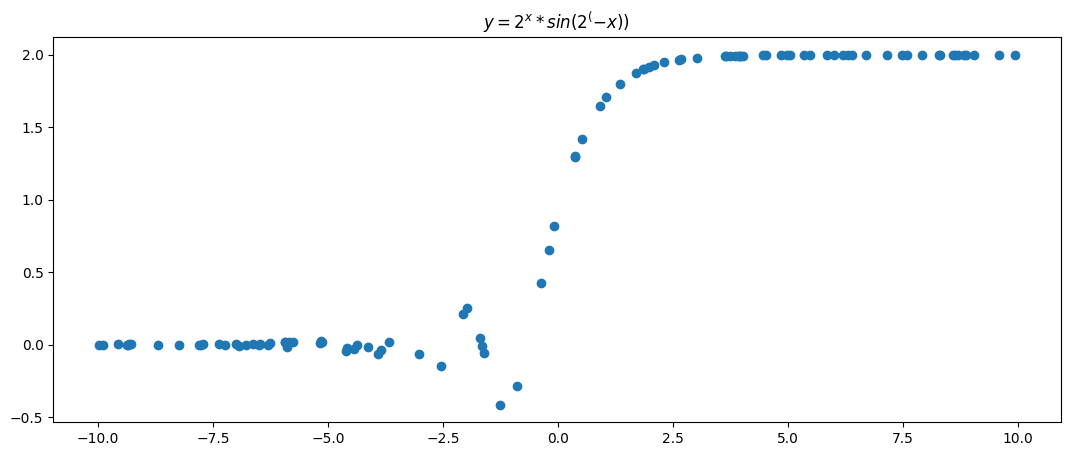

In [ ]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(2*pow(2,x_train*(-1)))*pow(2,x_train)
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = 2^x * sin(2^(-x))$');

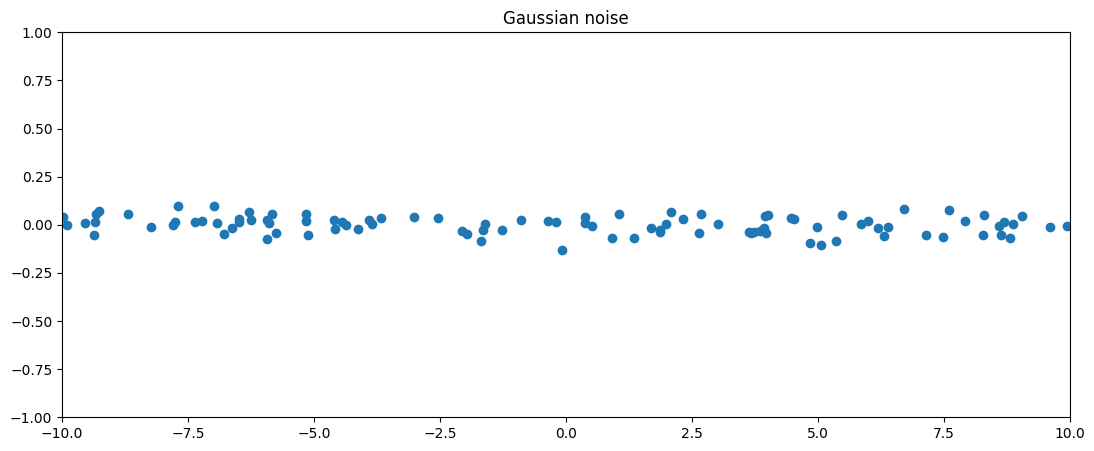

In [ ]:
noise = torch.randn(y_train.shape) / 20

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');


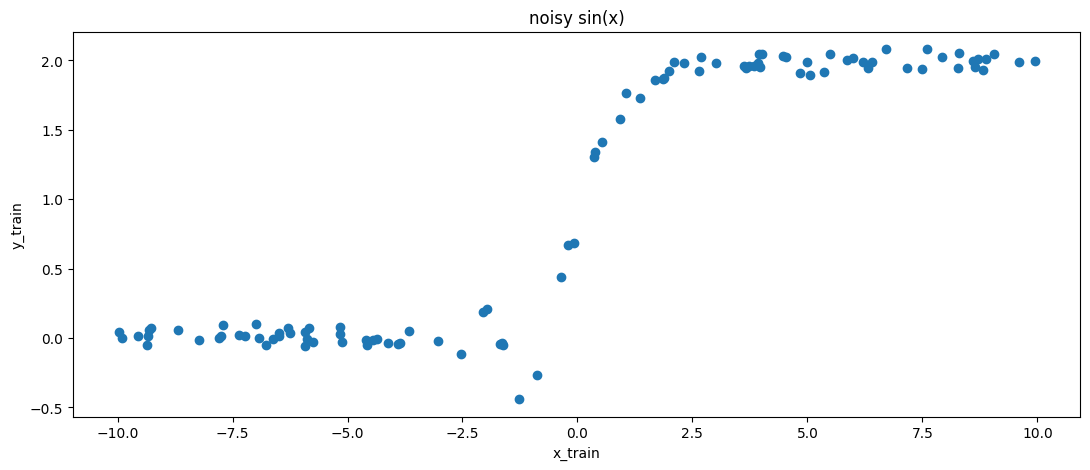

In [ ]:
y_train = y_train + noise

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);


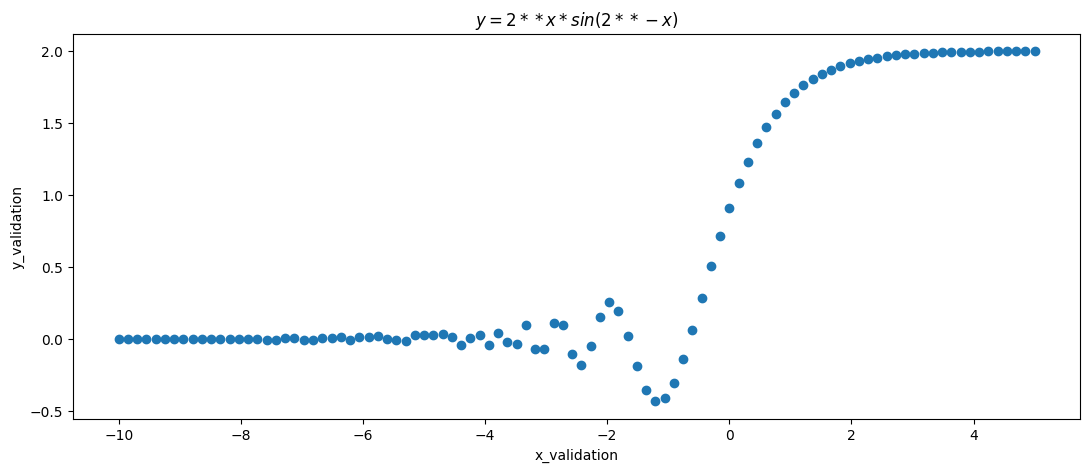

In [ ]:
x_validation = torch.linspace(-10, 5, 100)
y_validation = torch.sin(2*pow(2,x_validation*(-1)))*pow(2,x_validation)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('$y = 2**x * sin(2**-x)$')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);


In [ ]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act3 = torch.nn.Tanh()
        self.fc4 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        return x

sine_net = SineNet(30)


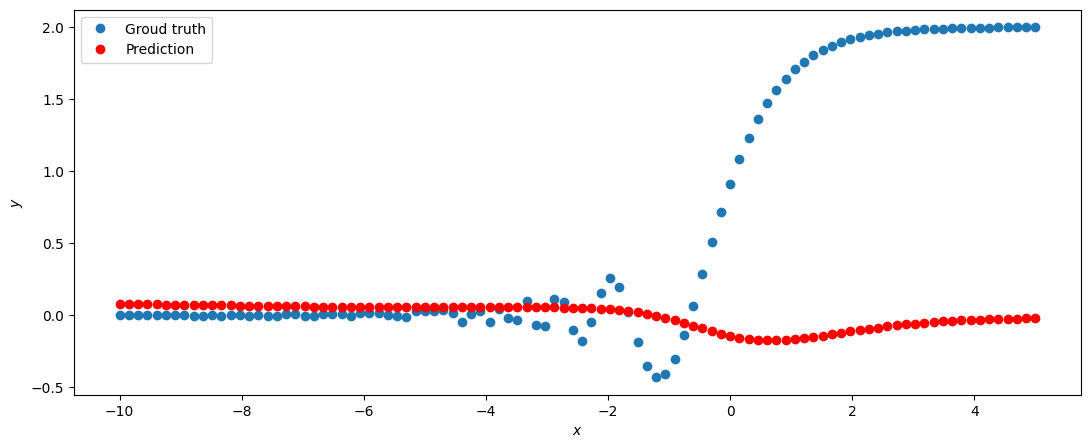

In [ ]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

In [ ]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [ ]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

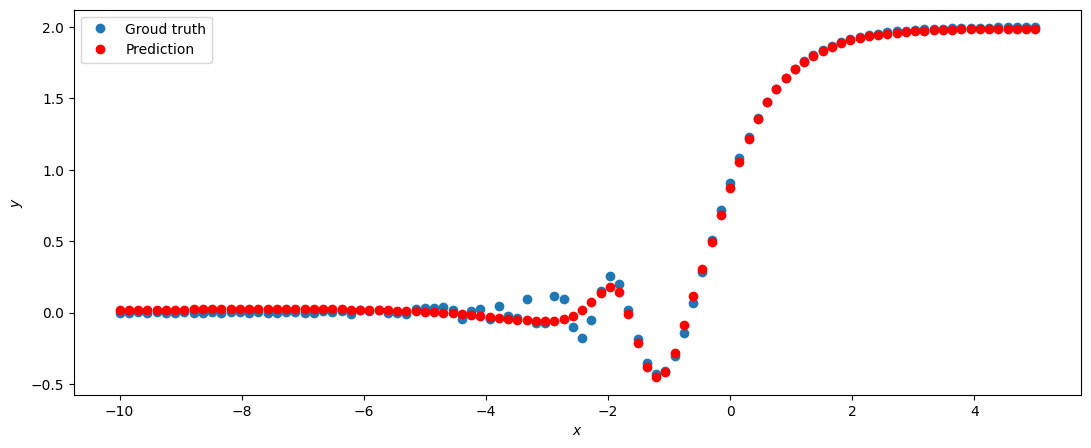

In [ ]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

In [1]:
# @title
for i in range(100):
  random.seed(i)
  if random.randint(0,10) == 5:
    print(i)

#testing


NameError: ignored

In [28]:
my_tensor = torch.ones(6,6)
#my_tensor = torch.nn.functional.pad(input=my_tensor, pad=(1, 1, 1, 1), mode='constant', value=0)
filter_size = 2
my_tensor 6 -> 3 stride 1
          6 -> 2 srride 2
          6 -> 2 stride 3
          6 -> 1 stride 4
filter_size = 3
          6 -> 2 stride 1
          6 -> 2 stride 2
          6 -> 1 stride 3

2*padding + heigh = new_h
2*padding + width = new_w
out_h = new_h + 1 - filter_size
out_w = new_w + 1 - filter_size

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])

In [61]:
i = 2
iter = 1
stride = 1
while i <=9:
  i+=1+stride
  if (i<=9):
    iter+=1

print(iter)


4


In [67]:
input_matrix_shape=[2, 3, 10, 10]
kernel_size=1
stride=2
padding=0
pad_h = 2*padding + input_matrix_shape[2]
pad_w = 2*padding + input_matrix_shape[3]
i = kernel_size - 1
j = kernel_size - 1
res_h = 1
res_w = 1
while i <=(pad_h - 1):
  i+=1+stride
  if (i<=(pad_h - 1)):
    res_h+=1

while j <=(pad_w - 1):
  j+=1+stride
  if (j<=(pad_w - 1)):
    res_w+=1

print(pad_h, pad_w, i, j, res_h, res_w)

10 10 12 12 4 4


In [59]:
my_tensor = torch.ones(10,10)
my_tensor

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])